# Canonical Correlation Analysis Practical Course

For this practical course we will use Canonical Correlation Analysis (CCA) to to identify and measure the associations among two sets of variables describing cars.

## The Data

We will use the ***Cars*** data set to illustrate the CCA in this practical course. Cars is a list of **features** for **n=406 automobiles** built between 1970 and 1982. Selecting attributes which describe a car’s **<font color="red"> physical system for the first variable set "X" </font>** , while grouping the **<font color="green"> performance-based variables in the second set "Y"</font>** , we will see the relationships between design choices and various performance metrics.  

Since CCA can only evaluate correlations between numeric variables, the analysis will omits two columns, **Model and Origin** which are string and categorical variables, respectively. Also note that Acceleration is a variable measuring the number of seconds required to accelerate from 0 to 60 mph, so lower values represent greater acceleration.

This data set provides an intuitive introduction to CCA because most people already have some idea of how a car’s manufacturing and performance features are related. Increasing **<font color="red"> weight, displacement, and number of cylinders </font>** all represent larger engines, which are in turn correlated with **<font color="green">  greater horsepower, lower miles per gallon (MPG), and faster acceleration </font>**. Due to the Arab oil embargos during the model years in this data set, engine sizes decreased over time to facilitate increased MPG.

## Import Libraries

Import the libraries you usually use for data analysis.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Data Acquisition and Pre-analysis

### Read the "cars.txt" file using read_csv.

In [ ]:
df = pd.read_csv('cars.txt', header=0, sep=', ')
print(df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0        8.0         307.0       130.0  3504.0          12.0   
1    15.0        8.0         350.0       165.0  3693.0          11.5   
2    18.0        8.0         318.0       150.0  3436.0          11.0   
3    16.0        8.0         304.0       150.0  3433.0          12.0   
4    17.0        8.0         302.0       140.0  3449.0          10.5   
5    15.0        8.0         429.0       198.0  4341.0          10.0   
6    14.0        8.0         454.0       220.0  4354.0           9.0   
7    14.0        8.0         440.0       215.0  4312.0           8.5   
8    14.0        8.0         455.0       225.0  4425.0          10.0   
9    15.0        8.0         390.0       190.0  3850.0           8.5   
10    NaN        4.0         133.0       115.0  3090.0          17.5   
11    NaN        8.0         350.0       165.0  4142.0          11.5   
12    NaN        8.0         351.0       153.0  4034.0          

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


### Check the head of the data

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


### Check the info() and describe() methods on the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
model.year      406 non-null float64
origin          406 non-null float64
dtypes: float64(8)
memory usage: 25.5 KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
n= df.shape[0] # nombre de voitures
d=  df.shape[1] # nombre de colonnes/variables (p+q)
print(n)
print(d)

406
8


#### Give a conclusion about this analysis (dimensions, type of the variables, NA values)

Le fichier contient 406 individus décrits par 6 variables quantitatives (mpg, cylinders, displacement, horsepower, weight, acceleration) et 2 variables qualitatives (model.year: nominal de type string (années 60...), origin: nominal de type catégoriel (nombre)). Il suffit de lire l'introduction sur les données.   
Pandas interprète toutes ces variables en float par défaut. Il faut faire attention à cela, ce n'est qu'un outil. On peut éventuellement préciser lors de la lecture du fichier le type de variable ou les changer après.  
Du fait que l'on n'a pas besoin de ces variables pour l'ACC, ce n'était pas nécessaire ici de faire le changement.  
Concernant les variables quantitatives, on peut ainsi remarquer que la plupart prennent valeur dans un intervalle discret.  Seule la variable d'accélération est de type continu. Laissons les en float.  
Pour les variables mpg et horsepower, présence respectivement de 8 et 6 valeurs manquantes (14 au total). Les autres variables ne contiennent pas de valeurs manquantes.

### Creating a pairplot of the data set

<u> Goal:</u> Analyze the correlation of the all set of variables

## Data Preparation

Next steps:
   - Replace missing values for the numerical attributes  
       =>  used strategy: median  
       => automatically detected by the package  
       => it is possible to select only the columns and to replace them later

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(df)
X = imputer.transform(df) #return a numpy array, cannot affect the result to the dataframe direclty
df_tr = pd.DataFrame(X,columns=df.columns)

In [ ]:
df_tr.info() #checking => OK

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
mpg             406 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
horsepower      406 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
model.year      406 non-null float64
origin          406 non-null float64
dtypes: float64(8)
memory usage: 25.5 KB


In [ ]:
df_tr.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


## ACC application

Next steps:
   - Apply ACC (with or without sklean package) /!\ Don't forget to split the dataset into two groups,i.e., p=3 and q=3
   - Analyse the correlation circle
   - Analyse the observation graph [*fr: graphe des individus*]

### Apply ACC (with or without sklean package)

In [ ]:
#1st step: determination of the two groups p=3 and q=3
# Ne pas prendre les 3ères colonnes puis les 3 prochaines! cf: énoncé
X = df_tr[["weight","cylinders","displacement"]]
p=X.shape[1]
print("p:",p)
print("n:",X.shape[0])
print(n==X.shape[0])

Y = df_tr[["mpg","horsepower","acceleration"]]
q=Y.shape[1]
print("q:",q)
print("n:",Y.shape[0])
print(n==Y.shape[0])

p: 3
n: 406
True
q: 3
n: 406
True


#### Without sklearn (with biased variance and covariance)

##### Step 1: Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

scaler.fit(Y)
Y = scaler.transform(Y)

##### Step 2: Calculate the intra and inter group covariances

In [ ]:
Cor = np.corrcoef(X, Y,rowvar=False) # np.corrcoef(X.T, Y.T)
print("Dim full correlation matrix: ",Cor.shape)
Vxx = Cor[0:3,0:3]
print("Dim Vxx: ",Vxx.shape)
Vyy = Cor[3:6,3:6]
print("Dim Vyy: ",Vyy.shape)
Vxy =Cor[0:3,3:6]
print("Dim Vxy: ",Vxy.shape)
Vyx = Cor[3:6,0:3]
print("Dim Vyx: ",Vyx.shape)

Dim full correlation matrix:  (6, 6)
Dim Vxx:  (3, 3)
Dim Vyy:  (3, 3)
Dim Vxy:  (3, 3)
Dim Vyx:  (3, 3)


##### Step 3: Calculate $R_x$ and $R_y$

In [ ]:
Rx = np.dot(np.dot(np.linalg.inv(Vxx), Vxy), np.dot(np.linalg.inv(Vyy), Vyx))
print("Dim Rx: ",Rx.shape)
Ry = np.dot(np.dot(np.linalg.inv(Vyy), Vyx), np.dot(np.linalg.inv(Vxx), Vxy))
print("Dim Ry: ",Ry.shape)

Dim Rx:  (3, 3)
Dim Ry:  (3, 3)


##### Step 4: Calculate the eigenvalues $\lambda_k$ and eigenvectors $a_k$, $b_k$ respectively for $R_x$ and $R_y$

In [ ]:
from numpy.linalg import eig
lambda_a, a = eig(Rx)
print("lambda_1: ",lambda_a)
print("a: ",a)
print("Dim a: ",a.shape)
lambda_b, b = eig(Ry)
print("lambda_2: ",lambda_b)
print("b: ",b)
print("Dim b: ",b.shape)

lambda_1:  [0.86360061 0.18650273 0.00794063]
a:  [[-0.71023387  0.69221852 -0.05958634]
 [ 0.13007099  0.02555116  0.75431907]
 [-0.69184492 -0.72123551 -0.65379829]]
Dim a:  (3, 3)
lambda_2:  [0.86360061 0.00794063 0.18650273]
b:  [[-0.33103858  0.59318242 -0.4055044 ]
 [ 0.92138472  0.73158487  0.12893964]
 [ 0.20362625  0.33603302  0.90495345]]
Dim b:  (3, 3)


##### Step 5: Calculate the canonical components $U_k$ and $V_k$
Be careful, the eigenvectors associated to $R_y$ are not sorted in the decreasing order.  
If you consider, the first two components, we need to select the eigenvectors indexed 0 and 2.

In [ ]:
U = np.dot(X,a[:,0:2])
print("U: ",U)#les signes ont l'air d'être inversés
print("Dim U: ",U.shape)
V = np.dot(Y,b[:,[0,2]])
print("V: ",V)
print("Dim V: ",V.shape)


U:  [[-9.89270749e-01 -3.05381424e-01]
 [-1.43183360e+00 -4.46675741e-01]
 [-1.00480278e+00 -4.36730469e-01]
 [-9.09856043e-01 -3.42830719e-01]
 [-9.10084980e-01 -3.15973571e-01]
 [-2.49742621e+00 -4.60156007e-01]
 [-2.67339058e+00 -6.21580263e-01]
 [-2.54570104e+00 -5.59592783e-01]
 [-2.73960128e+00 -5.70366033e-01]
 [-1.82772454e+00 -5.93507084e-01]
 [ 2.02804670e-01  4.93639785e-01]
 [-1.80879561e+00 -7.92755053e-02]
 [-1.72472524e+00 -1.74530412e-01]
 [-2.04681117e+00 -2.86758601e-01]
 [-1.62966441e+00 -3.87033070e-01]
 [-1.54055706e+00 -7.80171391e-01]
 [-1.29529059e+00 -4.46585190e-01]
 [-8.29487310e-01 -3.94526851e-01]
 [-1.81902383e+00 -7.35157193e-01]
 [-1.61543170e+00 -1.66602064e+00]
 [ 9.37648161e-01  4.37760557e-02]
 [ 1.41566459e-01 -1.34130728e-01]
 [ 1.84498439e-01 -1.89290732e-01]
 [ 3.34893979e-01 -3.49188442e-01]
 [ 1.24645352e+00 -4.41241963e-02]
 [ 1.49412345e+00 -2.85511879e-01]
 [ 7.05586456e-01  3.09902457e-01]
 [ 9.28565761e-01  1.32530132e-01]
 [ 9.94547522e-0

In [ ]:
U=-U

In [ ]:
corr_cca1 = pd.DataFrame(np.corrcoef(U.T, V.T),index=["$U_1$","$U_2$","$V_1$","$V_2$"],columns=["$U_1$","$U_2$","$V_1$","$V_2$"])
corr_cca1.style.background_gradient(cmap='coolwarm') #full matrix

,$U_1$,$U_2$,$V_1$,$V_2$
$U_1$,1,1.00309e-15,0.929301,-1.38352e-15
$U_2$,1.00309e-15,1,-8.05616e-16,-0.43186
$V_1$,0.929301,-8.05616e-16,1,-1.53951e-15
$V_2$,-1.38352e-15,-0.43186,-1.53951e-15,1


#### With sklearn

In [ ]:
from sklearn.cross_decomposition import CCA

cca = CCA(n_components=2)
cca.fit(X, Y)
U_, V_ = cca.transform(X, Y)
corr_cca2 = pd.DataFrame(np.corrcoef(U_.T, V_.T),index=["$U_1$","$U_2$","$V_1$","$V_2$"],columns=["$U_1$","$U_2$","$V_1$","$V_2$"])
corr_cca2.style.background_gradient(cmap='coolwarm')

,$U_1$,$U_2$,$V_1$,$V_2$
$U_1$,1,4.2607e-16,0.929301,7.3557e-16
$U_2$,4.2607e-16,1,3.02538e-05,0.43186
$V_1$,0.929301,3.02538e-05,1,4.12625e-16
$V_2$,7.3557e-16,0.43186,4.12625e-16,1


In [ ]:
np.round(corr_cca2.loc["$U_1$","$V_1$"],decimals=3)

0.929

La corrélation est positive et forte.

### Variable representation

In [ ]:
# en utilisant sklearn, vous devez quand même calculer les matrices centrée-réduites pour tracer le cercle de corrélation
scaled_data=pd.DataFrame(np.concatenate((X,Y),axis=1),columns=["weight","cylinders","displacement","mpg","horsepower","acceleration"])
scaled_data.head()

,weight,cylinders,displacement,mpg,horsepower,acceleration
0,0.620107,1.476349,1.070876,-0.712161,0.651885,-1.257080
1,0.843522,1.476349,1.481208,-1.100299,1.562102,-1.435658
2,0.539725,1.476349,1.175844,-0.712161,1.172009,-1.614235
3,0.536179,1.476349,1.042248,-0.970920,1.172009,-1.257080
4,0.555092,1.476349,1.023163,-0.841540,0.911947,-1.792813


In [ ]:
# Calcul C1 et C2
C1 = np.array((1/2)*(U_[:,0]+V_[:,0])) #avec sklearn, sinon utiliser U et V directement
print("Dim C1: ", C1.shape)
C2 = np.array((1/2)*(U_[:,1]+V_[:,1]))
print("Dim C2: ",C2.shape)
Caxes =  np.array([C1,C2])
print(Caxes.shape)

Dim C1:  (406,)
Dim C2:  (406,)
(2, 406)


In [ ]:
# Calcul la corrélation des variables avec les axes pour obtenir leurs coordonnées
corvar = np.corrcoef(Caxes, scaled_data.T) #use the scaled data

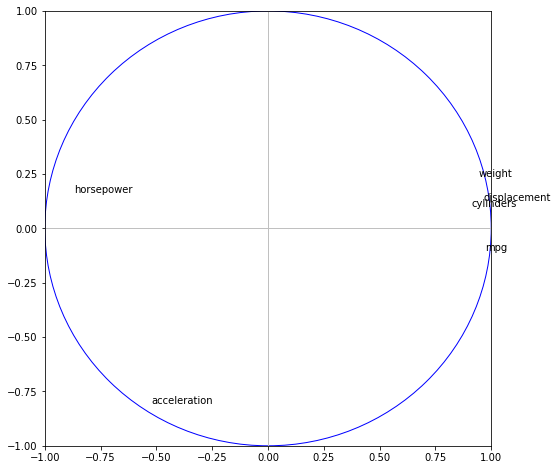

In [ ]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# Print the labels (variable names)
for j in range(q+p):
    plt.annotate(df.columns[j],(corvar[j+2,0],corvar[j+2,1]))

# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
# Print the correlation circle
plt.show()

### Observation visualization

Text(0, 0.5, 'Second CCA Components')

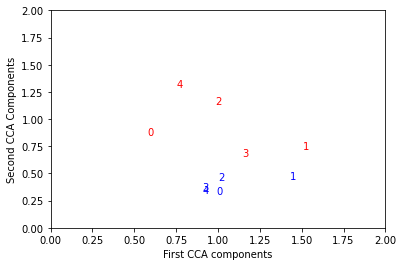

In [ ]:
# Reprensentation des individus sur le plan
U1 = U_[:,0][:5]
V1 = V_[:,0][:5]
U2 = U_[:,1][:5]
V2 = V_[:,1][:5]

for i in range(5):
    plt.annotate(i, (U1[i],U2[i]), color="b")
    plt.annotate(i, (V1[i],V2[i]), color="r")
plt.xlim(0,2)
plt.ylim(0,2)
plt.xlabel('First CCA components')
plt.ylabel('Second CCA Components')
# plt.savefig("obs_visualization_pratical")

In [ ]:
df[["weight","cylinders","displacement","mpg","horsepower","acceleration"]].head()

,weight,cylinders,displacement,mpg,horsepower,acceleration
0,3504.0,8.0,307.0,18.0,130.0,12.0
1,3693.0,8.0,350.0,15.0,165.0,11.5
2,3436.0,8.0,318.0,18.0,150.0,11.0
3,3433.0,8.0,304.0,16.0,150.0,12.0
4,3449.0,8.0,302.0,17.0,140.0,10.5


In [ ]:
df[["weight","cylinders","displacement","mpg","horsepower","acceleration"]].describe()

,weight,cylinders,displacement,mpg,horsepower,acceleration
count,406.000000,406.000000,406.000000,398.000000,400.000000,406.000000
mean,2979.413793,5.475369,194.779557,23.514573,105.082500,15.519704
std,847.004328,1.712160,104.922458,7.815984,38.768779,2.803359
min,1613.000000,3.000000,68.000000,9.000000,46.000000,8.000000
25%,2226.500000,4.000000,105.000000,17.500000,75.750000,13.700000
50%,2822.500000,4.000000,151.000000,23.000000,95.000000,15.500000
75%,3618.250000,8.000000,302.000000,29.000000,130.000000,17.175000
max,5140.000000,8.000000,455.000000,46.600000,230.000000,24.800000


![obs_visualization_pratical.png](attachment:obs_visualization_pratical.png)

### Conclusions

####Correlation Circle Representation: (Variable Graph)

Out of the 6 studied variables, 5 are strongly associated with the x-axis and explain it:

    Variables weight, displacement, and cylinders from group 1, which correspond to engine material characteristics, along with mpg from group 2, a performance characteristic, are highly correlated. They are positioned to the right of the circle.
    Horsepower from group 2, located to the left, is almost negatively correlated with the other variables. This can be explained by the fact that a car with a more powerful engine will have lower mpg and higher horsepower, indicating opposite directions.

The last variable from group 2, acceleration, explains the y-axis. It is negatively correlated with the other variables. There isn't a perfect 90-degree angle between mpg and acceleration, indicating they are not correlated.

The analyses from the description align well: a more powerful engine implies a more powerful car, faster acceleration, and lower fuel consumption.

####A Few Definitions

    MPG: Miles Per Gallon – a measure of how far a car can travel if you put just one gallon of petrol or diesel in its tank. Equivalent to fuel consumption of liters per 100 kilometers (l/100km) in metric units.
    Horsepower: a unit of power that represents an equivalence between the power delivered by a horse pulling a load and that provided by an engine.
    Engine displacement: the volume swept by the movement of a mobile part in the cylinder (variable number of cylinders)

###Individuals Graph Representation

The individuals exhibit distinct characteristics.
It is challenging to assess as the points are not overlapping. We can observe that for the car numbered 1, with higher values of material characteristics (weight and displacement) compared to the other 4 individuals, the two representing points are closer. Could this be due to the mpg value?
Vehicles indexed as 3 and 4 possess similar properties but differ in terms of acceleration/horsepower. The red point associated with vehicle 3 has a lower y value than that of vehicle 4 because a higher acceleration value corresponds to a lower y value.